In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

In [27]:
data_zoo = pd.read_csv("Zoo.csv")
data_zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [28]:
data_zoo.shape

(101, 18)

In [29]:
print("Annimal In Zoo Dataset : "+str(data_zoo.shape[0]))

Annimal In Zoo Dataset : 101


In [30]:
colname=[]
for x in data_zoo.columns:
    if data_zoo[x].dtypes=='object':
        colname.append(x)
colname

['animal name']

In [31]:
le=LabelEncoder()
for x in colname:
    data_zoo[x]=le.fit_transform(data_zoo[x])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print("Feature",x)
    print("mapping",le_name_mapping)

Feature animal name
mapping {'aardvark': 0, 'antelope': 1, 'bass': 2, 'bear': 3, 'boar': 4, 'buffalo': 5, 'calf': 6, 'carp': 7, 'catfish': 8, 'cavy': 9, 'cheetah': 10, 'chicken': 11, 'chub': 12, 'clam': 13, 'crab': 14, 'crayfish': 15, 'crow': 16, 'deer': 17, 'dogfish': 18, 'dolphin': 19, 'dove': 20, 'duck': 21, 'elephant': 22, 'flamingo': 23, 'flea': 24, 'frog': 25, 'fruitbat': 26, 'giraffe': 27, 'girl': 28, 'gnat': 29, 'goat': 30, 'gorilla': 31, 'gull': 32, 'haddock': 33, 'hamster': 34, 'hare': 35, 'hawk': 36, 'herring': 37, 'honeybee': 38, 'housefly': 39, 'kiwi': 40, 'ladybird': 41, 'lark': 42, 'leopard': 43, 'lion': 44, 'lobster': 45, 'lynx': 46, 'mink': 47, 'mole': 48, 'mongoose': 49, 'moth': 50, 'newt': 51, 'octopus': 52, 'opossum': 53, 'oryx': 54, 'ostrich': 55, 'parakeet': 56, 'penguin': 57, 'pheasant': 58, 'pike': 59, 'piranha': 60, 'pitviper': 61, 'platypus': 62, 'polecat': 63, 'pony': 64, 'porpoise': 65, 'puma': 66, 'pussycat': 67, 'raccoon': 68, 'reindeer': 69, 'rhea': 70, '

In [32]:
data_zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


1. Analyse the data using the visualizations

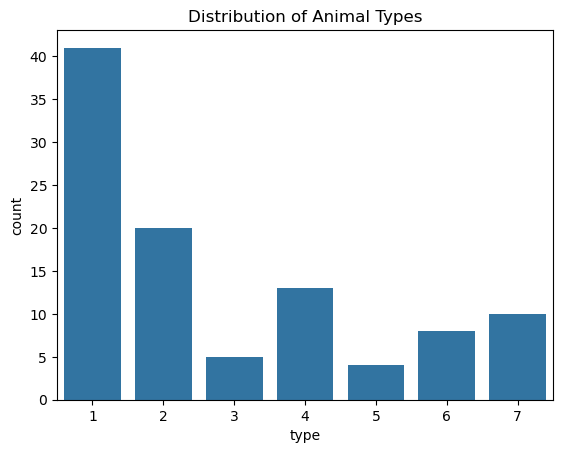

In [33]:
sns.countplot(x = "type", data = data_zoo)
plt.title("Distribution of Animal Types")
plt.show()

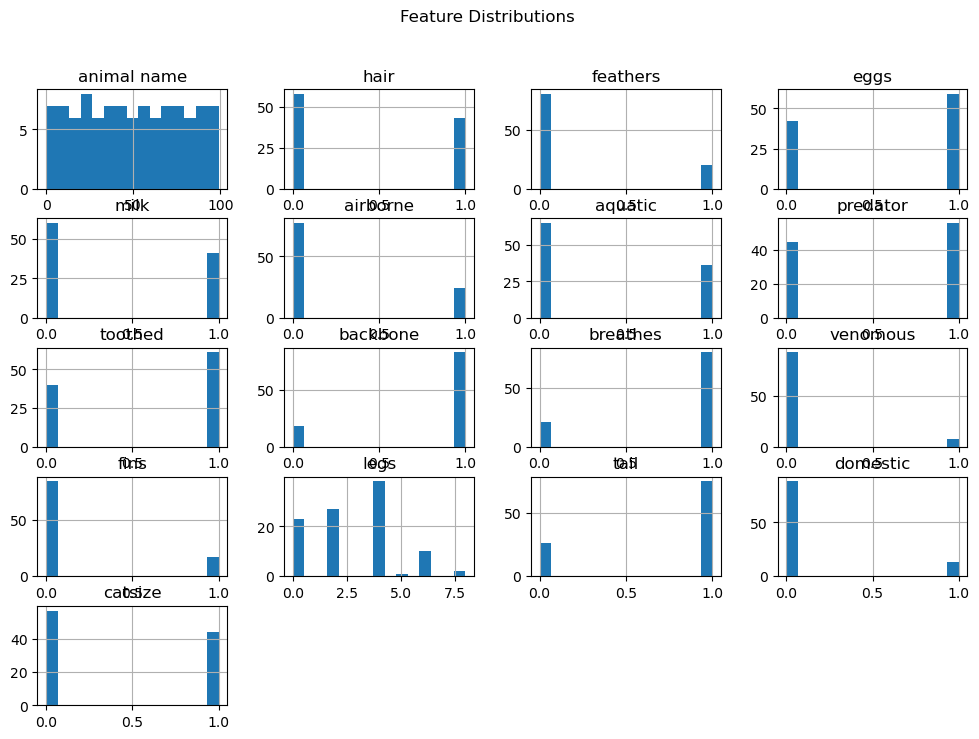

In [34]:
# Histograms for features
data_zoo.drop("type", axis=1).hist(bins=15, figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.show()

(101, 18)


<Axes: title={'center': 'Outlier Detection'}>

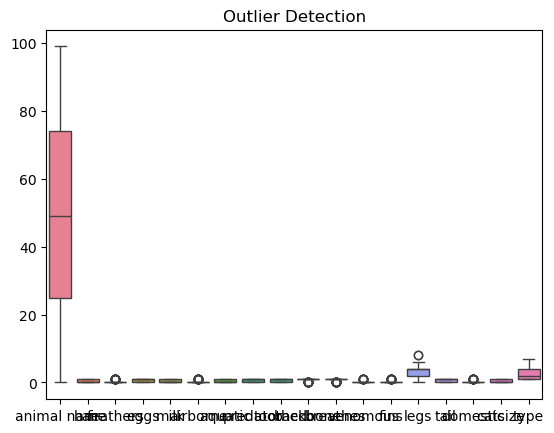

In [35]:
# Detect Outlier 

Q1 = data_zoo.quantile(0.25)
Q3 = data_zoo.quantile(0.75)
IQR = Q3-Q1
outlier = ((data_zoo < (Q1 < 1.5 * IQR)) | ((data_zoo > Q3 + 1.5 * IQR)))
print(outlier.shape)
plt.title("Outlier Detection")
sns.boxplot(data = data_zoo) 

(33, 18)


<Axes: title={'center': 'Remove Outliers Boxplot'}>

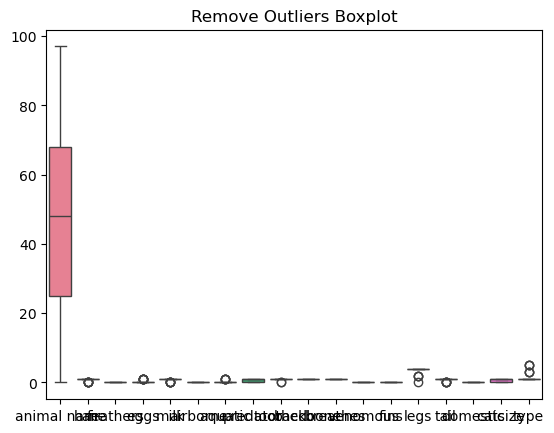

In [36]:
Q1 = data_zoo.quantile(0.25)
Q3 = data_zoo.quantile(0.75)
IQR = Q3-Q1
df_No_outlier = data_zoo[~((data_zoo < (Q1 - 1.5 * IQR))| ((data_zoo > (Q3 + 1.5 * IQR)))).any(axis=1)]
plt.title("Remove Outliers Boxplot")
print(df_No_outlier.shape)
sns.boxplot(data = df_No_outlier)

2. Preprocess the data by handling missing values & Outliers, if any.

In [37]:
data_zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [38]:
for i in data_zoo.columns:
    print(f"{i} : {data_zoo[i].nunique()}")
    data_zoo.dtypes


animal name : 100
hair : 2
feathers : 2
eggs : 2
milk : 2
airborne : 2
aquatic : 2
predator : 2
toothed : 2
backbone : 2
breathes : 2
venomous : 2
fins : 2
legs : 6
tail : 2
domestic : 2
catsize : 2
type : 7


In [39]:
# Handle missing values
print("Missing values:\n", data_zoo.isnull().sum())
data_zoo.fillna(data_zoo.median(numeric_only=True), inplace=True)   # fill numeric with median
data_zoo.fillna(data_zoo.mode().iloc[0], inplace=True)              # fill categorical with mode


Missing values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [40]:
data_zoo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   animal name  101 non-null    int32
 1   hair         101 non-null    int64
 2   feathers     101 non-null    int64
 3   eggs         101 non-null    int64
 4   milk         101 non-null    int64
 5   airborne     101 non-null    int64
 6   aquatic      101 non-null    int64
 7   predator     101 non-null    int64
 8   toothed      101 non-null    int64
 9   backbone     101 non-null    int64
 10  breathes     101 non-null    int64
 11  venomous     101 non-null    int64
 12  fins         101 non-null    int64
 13  legs         101 non-null    int64
 14  tail         101 non-null    int64
 15  domestic     101 non-null    int64
 16  catsize      101 non-null    int64
 17  type         101 non-null    int64
dtypes: int32(1), int64(17)
memory usage: 13.9 KB


In [41]:
# Handle outliers using IQR capping
for col in data_zoo.drop("type", axis=1).columns:
    Q1 = data_zoo[col].quantile(0.25)
    Q3 = data_zoo[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data_zoo[col] = np.where(data_zoo[col] < lower, lower,
                       np.where(data_zoo[col] > upper, upper, data_zoo[col]))

3. Split the dataset into training and testing sets (80% training, 20% testing).

In [42]:
x = data_zoo.drop('type', axis = 1)
y = data_zoo['type']

In [43]:
x

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
2,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
4,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0
97,96.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0
98,97.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
99,98.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=40, test_size=0.2)


In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 17)
(21, 17)
(80,)
(21,)


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
prediction = knn.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
acc = accuracy_score(y_test, prediction)
print("Accurancy Score : ",acc)
print("Precision:", precision_score(y_test, prediction, average="weighted"))
print("Recall:", recall_score(y_test, prediction, average="weighted"))
print("F1-score:", f1_score(y_test, prediction, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, prediction))


Accurancy Score :  0.5238095238095238
Precision: 0.5502645502645502
Recall: 0.5238095238095238
F1-score: 0.5343358395989976

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.80      0.84        10
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       0.33      0.50      0.40         2

    accuracy                           0.52        21
   macro avg       0.37      0.38      0.37        21
weighted avg       0.55      0.52      0.53        21



c:\Users\patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patil\anaconda3\Lib\site-packag

7. Visualize the decision boundaries of the classifier.

In [50]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [51]:
# Reduce features to 2D
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(x_train)
X_test_2D = pca.transform(x_test)

In [52]:
# Train a separate KNN on 2D data for visualization
knn_2D = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_2D.fit(X_train_2D, y_train)  # Train on PCA 2D

KNeighborsClassifier()

In [53]:
# Create meshgrid
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                    np.arange(y_min, y_max, 0.01))

In [54]:
# Predict on the grid
Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

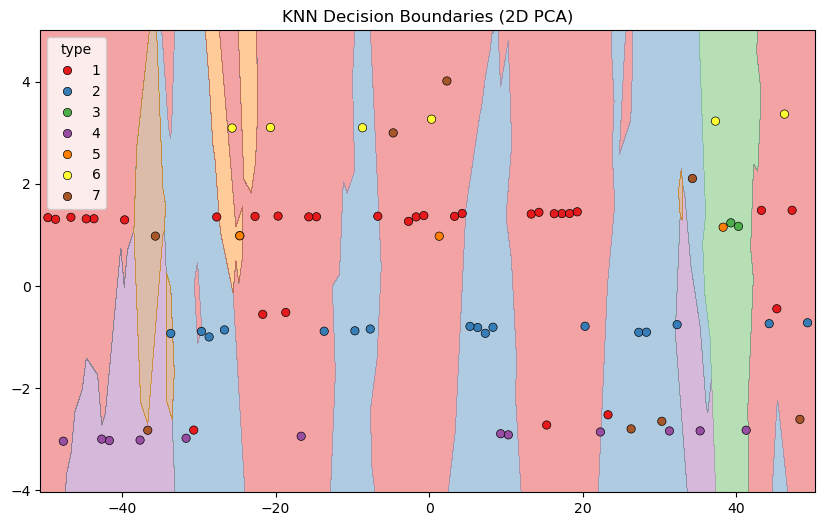

In [55]:
# Plot decision boundary
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(sns.color_palette("Set1", n_colors=len(np.unique(y_train)))))
sns.scatterplot(x=X_train_2D[:,0], y=X_train_2D[:,1], hue=y_train, palette="Set1", edgecolor='k')
plt.title("KNN Decision Boundaries (2D PCA)")
plt.show()

Interview Questions:

1. What are the key hyperparameters in KNN?

    Answer :

    The key hyperparameters for the K-Nearest Neighbors (KNN) algorithm are the number of neighbors (k), the distance metric (e.g., Euclidean), and neighbor weights, which determine how the algorithm identifies nearest neighbors and makes predictions. Choosing an optimal value for 'k' is crucial, as too few neighbors can lead to overfitting and a noisy decision boundary, while too many can result in underfitting and oversmoothing. 

    Here are the key hyperparameters of the KNN algorithm:
    
    Number of Neighbors (k): This is the most important hyperparameter, determining how many of the closest training examples the algorithm considers when making a prediction for a new data point. 
    
    Small 'k': Makes the model more sensitive to noise and outliers, leading to an irregular decision boundary (high variance, low bias). 
    
    Large 'k': Smoothes the decision boundary, making the model less sensitive to noise, but can overlook finer details, causing underfitting (high bias, low variance). 

    Best Practice: Using cross-validation to find the optimal 'k' is recommended. For classification, using an odd value of 'k' can prevent ties in majority voting. 

    Distance Metric: This hyperparameter specifies the method used to measure the distance between data points. 
    
    Common examples: include Euclidean distance and Manhattan distance, though other metrics can be used. 
    The choice of distance metric depends on the nature of the data. 
    Neighbor Weights: This hyperparameter allows you to assign different importance or "weights" to the neighbors based on their distance from the new data point. 

    Uniform: All neighbors are given equal weights, which is the default behavior. 
    
    Distance: Points closer to the query point are given more weight than farther points 

    How to Tune Hyperparameters
    To find the best combination of these hyperparameters, techniques like Grid Search with cross-validation are commonly used. This process systematically evaluates different hyperparameter values to determine the combination that yields the best performance on unseen data.    

2. What distance metrics can be used in KNN?

    Answer : Common Distance Metrics 

    Euclidean Distance
    Description: The straight-line distance between two points in a space.
    Formula: sqrt(sum((x_i - y_i)^2))
    Use Case: Best for continuous numerical data, especially when features are well-scaled.

    Manhattan Distance (L1 Distance)
    Description: The sum of the absolute differences between coordinates, like traveling along city blocks.
    Formula: sum(|x_i - y_i|)
    Use Case: Useful for data with features on a grid-like path or when features are less sensitive to outliers.

    Minkowski Distance
    Description: A generalized metric that includes both Euclidean (p=2) and Manhattan (p=1) distances as special cases.
    Formula: (sum(|x_i - y_i|^p))^(1/p)
    Use Case: Offers flexibility, allowing you to tune the parameter 'p' to suit different scenarios.

    Other Metrics
    Hamming Distance
    Description: Measures the number of positions at which two strings or vectors differ. 
    Use Case: Suitable for categorical data where you compare feature equality. 
    
    Cosine Similarity
    Description: Measures the cosine of the angle between two vectors. Although it's a similarity measure, it can be converted into a distance metric for KNN. 
    Use Case: Often used for high-dimensional data, such as text data. 